In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=c829589ccccfeec9fe4b28b278ef35716002b69d074a8dcb8a99631d693b6bf6
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [18]:
from google.colab import drive
import json
import pprint
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [19]:
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Meme dataset

In [ ]:
meme_train_file_path = '/content/drive/My Drive/EXIST 2024 Memes Dataset/training/EXIST2024_training.json'

# Read the JSON file
with open(meme_train_file_path, 'r') as json_file:
  train_data = json.load(json_file)



```
"110001": {
    "id_EXIST": "110001",
    "lang": "es",
    "text": "2+2=5 MITO Albert Einstein tenía bajo rendimiento en la escuela. VERDAD 2+2=4 CAN is El feminismo de hoy en día defiende la estupidez humana y no los derechos de las mujeres quemo ellas afirman ",
    "meme": "110001.jpeg",
    "path_memes": "memes/110001.jpeg",
    "number_annotators": 6,
    "annotators": ["Annotator_1", "Annotator_2", "Annotator_3", "Annotator_4", "Annotator_5", "Annotator_6"],
    "gender_annotators": ["F", "F", "F", "M", "M", "M"],
    "age_annotators": ["18-22", "23-45", "46+", "46+", "18-22", "23-45"],
    "ethnicities_annotators": ["Hispano or Latino", "Hispano or Latino", "Hispano or Latino", "White or Caucasian", "Hispano or Latino", "Hispano or Latino"],
    "study_levels_annotators": ["High school degree or equivalent", "Master’s degree", "Master’s degree", "Bachelor’s degree", "Bachelor’s degree", "Bachelor’s degree"],
    "countries_annotators": ["Mexico", "Spain", "Argentina", "Spain", "Mexico", "Mexico"],
    "labels_task4": ["YES", "YES", "YES", "YES", "YES", "YES"],
    "labels_task5": ["DIRECT", "DIRECT", "DIRECT", "DIRECT", "DIRECT", "DIRECT"],
    "labels_task6": [
      ["IDEOLOGICAL-INEQUALITY", "STEREOTYPING-DOMINANCE", "MISOGYNY-NON-SEXUAL-VIOLENCE"],
      ["IDEOLOGICAL-INEQUALITY"],
      ["IDEOLOGICAL-INEQUALITY"],
      ["IDEOLOGICAL-INEQUALITY"],
      ["IDEOLOGICAL-INEQUALITY"],
      ["IDEOLOGICAL-INEQUALITY"]
    ],
    "split": "TRAIN-MEME_ES"
  },
```



In [ ]:
# Open a CSV file for writing
with open('EXIT2024_meme_train.csv', 'w', newline='') as file:
  train_csv_writer = csv.writer(file)

  # Write the header row
  headers = ['id', 'lang', 'text', 'meme', 'path_memes', 'number_annotators', 'annotators', 'gender_annotators', 'age_annotators',
            'ethnicities_annotators', 'study_levels_annotators', 'countries_annotators',
            'labels_task4', 'labels_task5', 'labels_task6', 'split']
  train_csv_writer.writerow(headers)

  # Write the data rows
  for key, value in train_data.items():
    row = [
    key,
    value['lang'],
    value['text'],
    value['meme'],
    value['path_memes'],
    value['number_annotators'],
    ';'.join(value['annotators']),
    ';'.join(value['gender_annotators']),
    ';'.join(value['age_annotators']),
    ';'.join(value['ethnicities_annotators']),
    ';'.join(value['study_levels_annotators']),
    ';'.join(value['countries_annotators']),
    ';'.join(value['labels_task4']),
    ';'.join(value['labels_task5']),
    ';'.join(['|'.join(labels) for labels in value['labels_task6']]),
    value['split']
    ]
    train_csv_writer.writerow(row)

In [ ]:
meme_train_all = pd.read_csv('EXIT2024_meme_train.csv')
meme_train_all.head()

,id,lang,text,meme,path_memes,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task4,labels_task5,labels_task6,split
0,110001,es,2+2=5 MITO Albert Einstein tenía bajo rendimie...,110001.jpeg,memes/110001.jpeg,6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;18-22;23-45,Hispano or Latino;Hispano or Latino;Hispano or...,High school degree or equivalent;Master’s degr...,Mexico;Spain;Argentina;Spain;Mexico;Mexico,YES;YES;YES;YES;YES;YES,DIRECT;DIRECT;DIRECT;DIRECT;DIRECT;DIRECT,IDEOLOGICAL-INEQUALITY|STEREOTYPING-DOMINANCE|...,TRAIN-MEME_ES
1,110002,es,CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS,110002.jpeg,memes/110002.jpeg,6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;18-22;23-45,Hispano or Latino;Hispano or Latino;Hispano or...,High school degree or equivalent;Master’s degr...,Mexico;Spain;Argentina;Spain;Mexico;Mexico,YES;YES;YES;YES;YES;YES,DIRECT;DIRECT;DIRECT;DIRECT;DIRECT;JUDGEMENTAL,IDEOLOGICAL-INEQUALITY|STEREOTYPING-DOMINANCE|...,TRAIN-MEME_ES
2,110003,es,ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...,110003.jpeg,memes/110003.jpeg,6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;18-22;23-45,Hispano or Latino;Hispano or Latino;Hispano or...,High school degree or equivalent;Master’s degr...,Mexico;Spain;Argentina;Spain;Mexico;Mexico,YES;YES;NO;NO;NO;NO,DIRECT;DIRECT;-;-;-;-,STEREOTYPING-DOMINANCE|OBJECTIFICATION|MISOGYN...,TRAIN-MEME_ES
3,110004,es,"Paises que ""apoyan"" los derechos de la mujer A...",110004.jpeg,memes/110004.jpeg,6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;18-22;23-45,Hispano or Latino;Hispano or Latino;Hispano or...,High school degree or equivalent;Master’s degr...,Mexico;Spain;Argentina;Spain;Mexico;Mexico,YES;YES;NO;NO;YES;NO,JUDGEMENTAL;JUDGEMENTAL;-;-;JUDGEMENTAL;-,IDEOLOGICAL-INEQUALITY;IDEOLOGICAL-INEQUALITY;...,TRAIN-MEME_ES
4,110005,es,Ya verás como este 8 de marzo hay uno que te s...,110005.jpeg,memes/110005.jpeg,6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;18-22;23-45,Hispano or Latino;Hispano or Latino;Hispano or...,High school degree or equivalent;Master’s degr...,Mexico;Spain;Argentina;Spain;Mexico;Mexico,NO;YES;NO;NO;YES;NO,-;JUDGEMENTAL;-;-;DIRECT;-,-;IDEOLOGICAL-INEQUALITY;-;-;IDEOLOGICAL-INEQU...,TRAIN-MEME_ES


In [ ]:
meme_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       4044 non-null   int64 
 1   lang                     4044 non-null   object
 2   text                     4044 non-null   object
 3   meme                     4044 non-null   object
 4   path_memes               4044 non-null   object
 5   number_annotators        4044 non-null   int64 
 6   annotators               4044 non-null   object
 7   gender_annotators        4044 non-null   object
 8   age_annotators           4044 non-null   object
 9   ethnicities_annotators   4044 non-null   object
 10  study_levels_annotators  4044 non-null   object
 11  countries_annotators     4044 non-null   object
 12  labels_task4             4044 non-null   object
 13  labels_task5             4044 non-null   object
 14  labels_task6             4044 non-null  

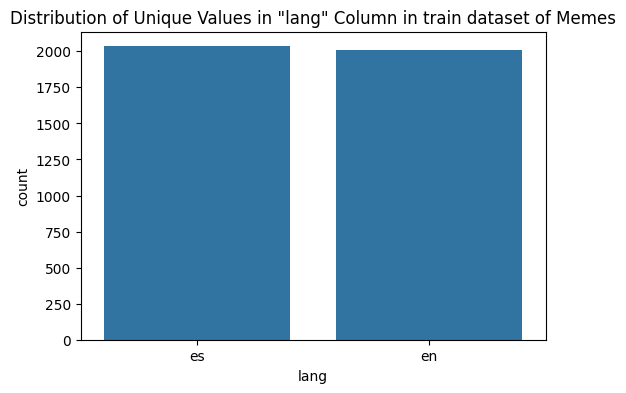

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='lang', data=meme_train_all)
plt.title('Distribution of Unique Values in "lang" Column in train dataset of Memes')
plt.show()

In [ ]:
from googletrans import Translator
# Create a Translator object
translator = Translator()

# Define a function to translate text
def translate_text(row):
    if row['lang'] == 'es':
        return translator.translate(row['text'], src='es', dest='en').text
    else:
        return translator.translate(row['text'], src='en', dest='es').text

# Create a new dataframe where Spanish texts are translated to English
meme_train_df_en = meme_train_all.copy()
meme_train_df_en.loc[meme_train_df_en['lang'] == 'es', 'text'] = meme_train_df_en.loc[meme_train_df_en['lang'] == 'es'].apply(translate_text, axis=1)

# Create a new dataframe where English texts are translated to Spanish
meme_train_df_es = meme_train_all.copy()
meme_train_df_es.loc[meme_train_df_es['lang'] == 'en', 'text'] = meme_train_df_es.loc[meme_train_df_es['lang'] == 'en'].apply(translate_text, axis=1)

# Print the new dataframes
print("Dataframe with Spanish text translated to English:")
print(meme_train_df_en)
print("\\nDataframe with English text translated to Spanish:")
print(meme_train_df_es)

Dataframe with Spanish text translated to English:
          id lang                                               text  \
0     110001   es  2+2=5 MYTH Albert Einstein performed poorly in...   
1     110002   es          WHEN A WOMAN GOES TO FIGHT FOR HER RIGHTS   
2     110003   es  ІЯ ЕГЕЯ Е MOA Is the Republican Party seeking ...   
3     110004   es  Countries that "support" women's rights Do you...   
4     110005   es  You'll see how this March 8th there is someone...   
...      ...  ...                                                ...   
4039  212006   en    u gon act like a bitch u gon die like a bitch     
4040  212007   en  SHE LOOKS LIKE EVERY OTHER BITCH LIKE makeamem...   
4041  212008   en               YOURE A BASIC BITCH CASE DISMISSED     
4042  212009   en  WHEN YOU'RE AUNT HAS THIS WEIRD ASS MAN AND SH...   
4043  212010   en  MUCH BUTTHURTI SENSE IN YOU CRY LIKE A BITCH Y...   

             meme         path_memes  number_annotators  \
0     110001.jpeg  memes/

In [ ]:
meme_train_df_en.to_csv("meme_train_all_en.csv", index=False)
meme_train_df_es.to_csv("meme_train_all_es.csv", index=False)

In [ ]:
meme_gold_task4_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task4_gold_soft.json'
meme_gold_task4_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task4_gold_hard.json'

meme_gold_task5_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task5_gold_soft.json'
meme_gold_task5_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task5_gold_hard.json'

meme_gold_task6_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task6_gold_soft.json'
meme_gold_task6_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task6_gold_hard.json'

# Read the JSON file
with open(meme_gold_task4_soft_file_path, 'r') as json_file:
  mgt4s_data = json.load(json_file)

# Read the JSON file
with open(meme_gold_task4_hard_file_path, 'r') as json_file:
  mgt4h_data = json.load(json_file)

# Read the JSON file
with open(meme_gold_task5_soft_file_path, 'r') as json_file:
  mgt5s_data = json.load(json_file)

# Read the JSON file
with open(meme_gold_task5_hard_file_path, 'r') as json_file:
  mgt5h_data = json.load(json_file)

# Read the JSON file
with open(meme_gold_task6_soft_file_path, 'r') as json_file:
  mgt6s_data = json.load(json_file)

# Read the JSON file
with open(meme_gold_task6_hard_file_path, 'r') as json_file:
  mgt6h_data = json.load(json_file)

In [25]:
import csv
import json

# Assuming json_files is your list of dictionaries
json_files = [
    {"name": "mgt4s_data", "data": mgt4s_data},
    {"name": "mgt4h_data", "data": mgt4h_data},
    {"name": "mgt5s_data", "data": mgt5s_data},
    {"name": "mgt5h_data", "data": mgt5h_data},
    {"name": "mgt6s_data", "data": mgt6s_data},
    {"name": "mgt6h_data", "data": mgt6h_data},
]

# Create a dictionary to store the data from all JSON files
all_data = {}

# Process each JSON file
for file in json_files:
    for item in file["data"]:
        # Get the ID of the item
        id = item["id"]

        # If this ID is not in all_data yet, add it
        if id not in all_data:
            all_data[id] = {"id": id}

        # Add the value from this JSON file to the dictionary for this ID
        all_data[id]["value_" + file["name"]] = json.dumps(item["value"])

# Convert the dictionary to a list (which is what DictWriter wants)
rows = list(all_data.values())

# Open or create the CSV file
with open('output.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.DictWriter(csvfile, fieldnames=rows[0].keys())

    # Write the header to the CSV file
    writer.writeheader()

    # Write the data to the CSV file
    writer.writerows(rows)


In [26]:
meme_gold = pd.read_csv('output.csv')
meme_gold.head()

,id,value_mgt4s_data,value_mgt4h_data,value_mgt5s_data,value_mgt5h_data,value_mgt6s_data,value_mgt6h_data
0,110001,"{""YES"": 1.0, ""NO"": 0.0}","""YES""","{""DIRECT"": 1.0, ""NO"": 0.0, ""JUDGEMENTAL"": 0.0}","""DIRECT""","{""IDEOLOGICAL-INEQUALITY"": 1.0, ""STEREOTYPING-...","[""IDEOLOGICAL-INEQUALITY""]"
1,110002,"{""YES"": 1.0, ""NO"": 0.0}","""YES""","{""DIRECT"": 0.8333333333333334, ""JUDGEMENTAL"": ...","""DIRECT""","{""IDEOLOGICAL-INEQUALITY"": 0.6666666666666666,...","[""IDEOLOGICAL-INEQUALITY"", ""MISOGYNY-NON-SEXUA..."
2,110003,"{""YES"": 0.3333333333333333, ""NO"": 0.6666666666...","""NO""","{""DIRECT"": 0.3333333333333333, ""NO"": 0.6666666...","""NO""","{""STEREOTYPING-DOMINANCE"": 0.3333333333333333,...","[""NO""]"
3,110004,"{""YES"": 0.5, ""NO"": 0.5}",NaN,"{""JUDGEMENTAL"": 0.5, ""NO"": 0.5, ""DIRECT"": 0.0}",NaN,"{""IDEOLOGICAL-INEQUALITY"": 0.3333333333333333,...",NaN
4,110005,"{""NO"": 0.6666666666666666, ""YES"": 0.3333333333...","""NO""","{""NO"": 0.6666666666666666, ""JUDGEMENTAL"": 0.16...","""NO""","{""NO"": 0.6666666666666666, ""IDEOLOGICAL-INEQUA...","[""NO""]"


# Tweets

In [38]:
tweet_dev_gold_task1_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_dev_task1_gold_soft.json'
tweet_dev_gold_task1_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_dev_task1_gold_hard.json'

tweet_dev_gold_task2_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_dev_task2_gold_soft.json'
tweet_dev_gold_task2_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_dev_task2_gold_hard.json'

tweet_dev_gold_task3_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_dev_task3_gold_soft.json'
tweet_dev_gold_task3_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_dev_task3_gold_hard.json'

# Read the JSON file
with open(tweet_dev_gold_task1_soft_file_path, 'r') as json_file:
  tdgt1s_data = json.load(json_file)

# Read the JSON file
with open(tweet_dev_gold_task1_hard_file_path, 'r') as json_file:
  tdgt1h_data = json.load(json_file)

# Read the JSON file
with open(tweet_dev_gold_task2_soft_file_path, 'r') as json_file:
  tdgt2s_data = json.load(json_file)

# Read the JSON file
with open(tweet_dev_gold_task2_hard_file_path, 'r') as json_file:
  tdgt2h_data = json.load(json_file)

# Read the JSON file
with open(tweet_dev_gold_task3_soft_file_path, 'r') as json_file:
  tdgt3s_data = json.load(json_file)

# Read the JSON file
with open(tweet_dev_gold_task3_hard_file_path, 'r') as json_file:
  tdgt3h_data = json.load(json_file)

In [ ]:
tdgt3h_data

In [40]:
# Assuming json_files is your list of dictionaries
json_files = [
    {"name": "tdgt1s_data", "data": tdgt1s_data},
    {"name": "tdgt1h_data", "data": tdgt1h_data},
    {"name": "tdgt2s_data", "data": tdgt2s_data},
    {"name": "tdgt2h_data", "data": tdgt2h_data},
    {"name": "tdgt3s_data", "data": tdgt3s_data},
    {"name": "tdgt3h_data", "data": tdgt3h_data},
]

# Create a dictionary to store the data from all JSON files
all_data = {}

# Process each JSON file
for file in json_files:
    for item in file["data"]:
        # Get the ID of the item
        id = item["id"]

        # If this ID is not in all_data yet, add it
        if id not in all_data:
            all_data[id] = {"id": id}

        # Add the value from this JSON file to the dictionary for this ID
        all_data[id]["value_" + file["name"]] = json.dumps(item["value"])

# Convert the dictionary to a list (which is what DictWriter wants)
rows = list(all_data.values())

# Get all fieldnames
fieldnames = set().union(*[row.keys() for row in rows])

# Open or create the CSV file
with open('tweet_dev_gold_output.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header to the CSV file
    writer.writeheader()

    # Write the data to the CSV file
    writer.writerows(rows)


In [41]:
tweet_dev_gold = pd.read_csv('tweet_dev_gold_output.csv')
tweet_dev_gold.head()

,value_tdgt2h_data,value_tdgt1h_data,value_tdgt3h_data,value_tdgt1s_data,value_tdgt3s_data,id,value_tdgt2s_data
0,NaN,NaN,NaN,"{""NO"": 0.5, ""YES"": 0.5}","{""NO"": 0.5, ""MISOGYNY-NON-SEXUAL-VIOLENCE"": 0....",300001,"{""NO"": 0.5, ""JUDGEMENTAL"": 0.3333333333333333,..."
1,"""JUDGEMENTAL""","""YES""","[""IDEOLOGICAL-INEQUALITY"", ""STEREOTYPING-DOMIN...","{""YES"": 0.8333333333333334, ""NO"": 0.1666666666...","{""IDEOLOGICAL-INEQUALITY"": 0.3333333333333333,...",300002,"{""JUDGEMENTAL"": 0.5, ""REPORTED"": 0.33333333333..."
2,"""NO""","""NO""","[""NO""]","{""NO"": 1.0, ""YES"": 0.0}","{""NO"": 1.0, ""IDEOLOGICAL-INEQUALITY"": 0.0, ""ST...",300003,"{""NO"": 1.0, ""DIRECT"": 0.0, ""REPORTED"": 0.0, ""J..."
3,"""REPORTED""","""YES""","[""SEXUAL-VIOLENCE""]","{""NO"": 0.16666666666666666, ""YES"": 0.833333333...","{""NO"": 0.16666666666666666, ""SEXUAL-VIOLENCE"":...",300004,"{""NO"": 0.16666666666666666, ""REPORTED"": 0.6666..."
4,"""NO""","""NO""","[""NO""]","{""NO"": 0.8333333333333334, ""YES"": 0.1666666666...","{""NO"": 0.8333333333333334, ""STEREOTYPING-DOMIN...",300005,"{""NO"": 0.8333333333333334, ""DIRECT"": 0.1666666..."


In [42]:
tweet_train_gold_task1_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task1_gold_soft.json'
tweet_train_gold_task1_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task1_gold_hard.json'

tweet_train_gold_task2_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task2_gold_soft.json'
tweet_train_gold_task2_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task2_gold_hard.json'

tweet_train_gold_task3_soft_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task3_gold_soft.json'
tweet_train_gold_task3_hard_file_path = '/content/drive/My Drive/EXIST 2024/evaluation/golds/EXIST2024_training_task3_gold_hard.json'

# Read the JSON file
with open(tweet_train_gold_task1_soft_file_path, 'r') as json_file:
  ttgt1s_data = json.load(json_file)

# Read the JSON file
with open(tweet_train_gold_task1_hard_file_path, 'r') as json_file:
  ttgt1h_data = json.load(json_file)

# Read the JSON file
with open(tweet_train_gold_task2_soft_file_path, 'r') as json_file:
  ttgt2s_data = json.load(json_file)

# Read the JSON file
with open(tweet_train_gold_task2_hard_file_path, 'r') as json_file:
  ttgt2h_data = json.load(json_file)

# Read the JSON file
with open(tweet_train_gold_task3_soft_file_path, 'r') as json_file:
  ttgt3s_data = json.load(json_file)

# Read the JSON file
with open(tweet_train_gold_task3_hard_file_path, 'r') as json_file:
  ttgt3h_data = json.load(json_file)

In [46]:
# Assuming json_files is your list of dictionaries
json_files = [
    {"name": "ttgt1s_data", "data": ttgt1s_data},
    {"name": "ttgt1h_data", "data": ttgt1h_data},
    {"name": "ttgt2s_data", "data": ttgt2s_data},
    {"name": "ttgt2h_data", "data": ttgt2h_data},
    {"name": "ttgt3s_data", "data": ttgt3s_data},
    {"name": "ttgt3h_data", "data": ttgt3h_data},
]

# Create a dictionary to store the data from all JSON files
all_data = {}

# Process each JSON file
for file in json_files:
    for item in file["data"]:
        # Get the ID of the item
        id = item["id"]

        # If this ID is not in all_data yet, add it
        if id not in all_data:
            all_data[id] = {"id": id}

        # Add the value from this JSON file to the dictionary for this ID
        all_data[id]["value_" + file["name"]] = json.dumps(item["value"])

# Convert the dictionary to a list (which is what DictWriter wants)
rows = list(all_data.values())

# Open or create the CSV file
with open('tweet_train_gold_output_v2.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.DictWriter(csvfile, fieldnames=rows[0].keys())

    # Write the header to the CSV file
    writer.writeheader()

    # Write the data to the CSV file
    writer.writerows(rows)

In [47]:
tweet_train_gold = pd.read_csv('tweet_train_gold_output_v2.csv')
tweet_train_gold.head()

,id,value_ttgt1s_data,value_ttgt1h_data,value_ttgt2s_data,value_ttgt2h_data,value_ttgt3s_data,value_ttgt3h_data
0,100001,"{""YES"": 0.8333333333333334, ""NO"": 0.1666666666...","""YES""","{""REPORTED"": 0.5, ""JUDGEMENTAL"": 0.33333333333...","""REPORTED""","{""OBJECTIFICATION"": 0.3333333333333333, ""SEXUA...","[""OBJECTIFICATION"", ""SEXUAL-VIOLENCE""]"
1,100002,"{""NO"": 0.8333333333333334, ""YES"": 0.1666666666...","""NO""","{""NO"": 0.8333333333333334, ""DIRECT"": 0.1666666...","""NO""","{""NO"": 0.8333333333333334, ""OBJECTIFICATION"": ...","[""NO""]"
2,100003,"{""NO"": 1.0, ""YES"": 0.0}","""NO""","{""NO"": 1.0, ""DIRECT"": 0.0, ""REPORTED"": 0.0, ""J...","""NO""","{""NO"": 1.0, ""IDEOLOGICAL-INEQUALITY"": 0.0, ""ST...","[""NO""]"
3,100004,"{""NO"": 0.5, ""YES"": 0.5}",NaN,"{""NO"": 0.5, ""DIRECT"": 0.16666666666666666, ""RE...",NaN,"{""NO"": 0.5, ""IDEOLOGICAL-INEQUALITY"": 0.5, ""OB...",NaN
4,100005,"{""YES"": 0.6666666666666666, ""NO"": 0.3333333333...","""YES""","{""REPORTED"": 0.16666666666666666, ""NO"": 0.3333...",NaN,"{""STEREOTYPING-DOMINANCE"": 0.5, ""OBJECTIFICATI...","[""STEREOTYPING-DOMINANCE"", ""OBJECTIFICATION"", ..."


# Final Meme

In [50]:
meme_train_all_sc = meme_train_all.loc[:, ['id', 'text', 'lang', 'meme', 'path_memes']]
meme_train_all_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4044 non-null   int64 
 1   text        4044 non-null   object
 2   lang        4044 non-null   object
 3   meme        4044 non-null   object
 4   path_memes  4044 non-null   object
dtypes: int64(1), object(4)
memory usage: 158.1+ KB


In [51]:
meme_train_all_sc.head()

,id,text,lang,meme,path_memes
0,110001,2+2=5 MITO Albert Einstein tenía bajo rendimie...,es,110001.jpeg,memes/110001.jpeg
1,110002,CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS,es,110002.jpeg,memes/110002.jpeg
2,110003,ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...,es,110003.jpeg,memes/110003.jpeg
3,110004,"Paises que ""apoyan"" los derechos de la mujer A...",es,110004.jpeg,memes/110004.jpeg
4,110005,Ya verás como este 8 de marzo hay uno que te s...,es,110005.jpeg,memes/110005.jpeg


In [53]:
meme_merged_df = pd.merge(meme_train_all_sc, meme_gold, on='id', how='inner')

In [54]:
meme_merged_df.head()

,id,text,lang,meme,path_memes,value_mgt4s_data,value_mgt4h_data,value_mgt5s_data,value_mgt5h_data,value_mgt6s_data,value_mgt6h_data
0,110001,2+2=5 MITO Albert Einstein tenía bajo rendimie...,es,110001.jpeg,memes/110001.jpeg,"{""YES"": 1.0, ""NO"": 0.0}","""YES""","{""DIRECT"": 1.0, ""NO"": 0.0, ""JUDGEMENTAL"": 0.0}","""DIRECT""","{""IDEOLOGICAL-INEQUALITY"": 1.0, ""STEREOTYPING-...","[""IDEOLOGICAL-INEQUALITY""]"
1,110002,CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS,es,110002.jpeg,memes/110002.jpeg,"{""YES"": 1.0, ""NO"": 0.0}","""YES""","{""DIRECT"": 0.8333333333333334, ""JUDGEMENTAL"": ...","""DIRECT""","{""IDEOLOGICAL-INEQUALITY"": 0.6666666666666666,...","[""IDEOLOGICAL-INEQUALITY"", ""MISOGYNY-NON-SEXUA..."
2,110003,ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...,es,110003.jpeg,memes/110003.jpeg,"{""YES"": 0.3333333333333333, ""NO"": 0.6666666666...","""NO""","{""DIRECT"": 0.3333333333333333, ""NO"": 0.6666666...","""NO""","{""STEREOTYPING-DOMINANCE"": 0.3333333333333333,...","[""NO""]"
3,110004,"Paises que ""apoyan"" los derechos de la mujer A...",es,110004.jpeg,memes/110004.jpeg,"{""YES"": 0.5, ""NO"": 0.5}",NaN,"{""JUDGEMENTAL"": 0.5, ""NO"": 0.5, ""DIRECT"": 0.0}",NaN,"{""IDEOLOGICAL-INEQUALITY"": 0.3333333333333333,...",NaN
4,110005,Ya verás como este 8 de marzo hay uno que te s...,es,110005.jpeg,memes/110005.jpeg,"{""NO"": 0.6666666666666666, ""YES"": 0.3333333333...","""NO""","{""NO"": 0.6666666666666666, ""JUDGEMENTAL"": 0.16...","""NO""","{""NO"": 0.6666666666666666, ""IDEOLOGICAL-INEQUA...","[""NO""]"


In [55]:
meme_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4044 non-null   int64 
 1   text              4044 non-null   object
 2   lang              4044 non-null   object
 3   meme              4044 non-null   object
 4   path_memes        4044 non-null   object
 5   value_mgt4s_data  4044 non-null   object
 6   value_mgt4h_data  3420 non-null   object
 7   value_mgt5s_data  4044 non-null   object
 8   value_mgt5h_data  3197 non-null   object
 9   value_mgt6s_data  4044 non-null   object
 10  value_mgt6h_data  3407 non-null   object
dtypes: int64(1), object(10)
memory usage: 347.7+ KB


In [57]:
meme_merged_df.to_csv('final_meme_train_all.csv')

In [58]:
from googletrans import Translator
# Create a Translator object
translator = Translator()

# Define a function to translate text
def translate_text(row):
    if row['lang'] == 'es':
        return translator.translate(row['text'], src='es', dest='en').text
    else:
        return translator.translate(row['text'], src='en', dest='es').text

# Create a new dataframe where Spanish texts are translated to English
meme_train_df_en = meme_merged_df.copy()
meme_train_df_en.loc[meme_train_df_en['lang'] == 'es', 'text'] = meme_train_df_en.loc[meme_train_df_en['lang'] == 'es'].apply(translate_text, axis=1)

# Create a new dataframe where English texts are translated to Spanish
meme_train_df_es = meme_merged_df.copy()
meme_train_df_es.loc[meme_train_df_es['lang'] == 'en', 'text'] = meme_train_df_es.loc[meme_train_df_es['lang'] == 'en'].apply(translate_text, axis=1)

# Print the new dataframes
print("Dataframe with Spanish text translated to English:")
print(meme_train_df_en)
print("\\nDataframe with English text translated to Spanish:")
print(meme_train_df_es)

Dataframe with Spanish text translated to English:
          id                                               text lang  \
0     110001  2+2=5 MYTH Albert Einstein performed poorly in...   es   
1     110002          WHEN A WOMAN GOES TO FIGHT FOR HER RIGHTS   es   
2     110003  ІЯ ЕГЕЯ Е MOA Is the Republican Party seeking ...   es   
3     110004  Countries that "support" women's rights Do you...   es   
4     110005  You'll see how this March 8th there is someone...   es   
...      ...                                                ...  ...   
4039  212006    u gon act like a bitch u gon die like a bitch     en   
4040  212007  SHE LOOKS LIKE EVERY OTHER BITCH LIKE makeamem...   en   
4041  212008               YOURE A BASIC BITCH CASE DISMISSED     en   
4042  212009  WHEN YOU'RE AUNT HAS THIS WEIRD ASS MAN AND SH...   en   
4043  212010  MUCH BUTTHURTI SENSE IN YOU CRY LIKE A BITCH Y...   en   

             meme         path_memes  \
0     110001.jpeg  memes/110001.jpeg   
1   

In [59]:
meme_train_df_en.to_csv('final_meme_train_en.csv')
meme_train_df_es.to_csv('final_meme_train_es.csv')

In [61]:
meme_train_df_en.info(), meme_train_df_en.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4044 non-null   int64 
 1   text              4044 non-null   object
 2   lang              4044 non-null   object
 3   meme              4044 non-null   object
 4   path_memes        4044 non-null   object
 5   value_mgt4s_data  4044 non-null   object
 6   value_mgt4h_data  3420 non-null   object
 7   value_mgt5s_data  4044 non-null   object
 8   value_mgt5h_data  3197 non-null   object
 9   value_mgt6s_data  4044 non-null   object
 10  value_mgt6h_data  3407 non-null   object
dtypes: int64(1), object(10)
memory usage: 347.7+ KB


(None,
        id                                               text lang  \
 0  110001  2+2=5 MYTH Albert Einstein performed poorly in...   es   
 1  110002          WHEN A WOMAN GOES TO FIGHT FOR HER RIGHTS   es   
 2  110003  ІЯ ЕГЕЯ Е MOA Is the Republican Party seeking ...   es   
 3  110004  Countries that "support" women's rights Do you...   es   
 4  110005  You'll see how this March 8th there is someone...   es   
 
           meme         path_memes  \
 0  110001.jpeg  memes/110001.jpeg   
 1  110002.jpeg  memes/110002.jpeg   
 2  110003.jpeg  memes/110003.jpeg   
 3  110004.jpeg  memes/110004.jpeg   
 4  110005.jpeg  memes/110005.jpeg   
 
                                     value_mgt4s_data value_mgt4h_data  \
 0                            {"YES": 1.0, "NO": 0.0}            "YES"   
 1                            {"YES": 1.0, "NO": 0.0}            "YES"   
 2  {"YES": 0.3333333333333333, "NO": 0.6666666666...             "NO"   
 3                            {"YES": 0.5, "N

In [60]:
meme_train_df_es.info(), meme_train_df_es.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4044 non-null   int64 
 1   text              4044 non-null   object
 2   lang              4044 non-null   object
 3   meme              4044 non-null   object
 4   path_memes        4044 non-null   object
 5   value_mgt4s_data  4044 non-null   object
 6   value_mgt4h_data  3420 non-null   object
 7   value_mgt5s_data  4044 non-null   object
 8   value_mgt5h_data  3197 non-null   object
 9   value_mgt6s_data  4044 non-null   object
 10  value_mgt6h_data  3407 non-null   object
dtypes: int64(1), object(10)
memory usage: 347.7+ KB


(None,
        id                                               text lang  \
 0  110001  2+2=5 MITO Albert Einstein tenía bajo rendimie...   es   
 1  110002     CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS    es   
 2  110003  ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...   es   
 3  110004  Paises que "apoyan" los derechos de la mujer A...   es   
 4  110005  Ya verás como este 8 de marzo hay uno que te s...   es   
 
           meme         path_memes  \
 0  110001.jpeg  memes/110001.jpeg   
 1  110002.jpeg  memes/110002.jpeg   
 2  110003.jpeg  memes/110003.jpeg   
 3  110004.jpeg  memes/110004.jpeg   
 4  110005.jpeg  memes/110005.jpeg   
 
                                     value_mgt4s_data value_mgt4h_data  \
 0                            {"YES": 1.0, "NO": 0.0}            "YES"   
 1                            {"YES": 1.0, "NO": 0.0}            "YES"   
 2  {"YES": 0.3333333333333333, "NO": 0.6666666666...             "NO"   
 3                            {"YES": 0.5, "N

# Final Train Tweet

In [62]:
train_tweet_df = pd.read_csv('/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/EXIT2024_train.csv')
train_tweet_df.head()

,id,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task1,labels_task2,labels_task3,split
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,Annotator_1;Annotator_2;Annotator_3;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,White or Caucasian;Hispano or Latino;White or ...,Bachelor’s degree;Bachelor’s degree;High schoo...,Italy;Mexico;United States;Spain;Spain;Chile,YES;YES;NO;YES;YES;YES,REPORTED;JUDGEMENTAL;-;REPORTED;JUDGEMENTAL;RE...,OBJECTIFICATION;OBJECTIFICATION|SEXUAL-VIOLENC...,TRAIN_ES
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,Annotator_7;Annotator_8;Annotator_9;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Black or African American;Hispano or Latino;Wh...,High school degree or equivalent;Bachelor’s de...,United Kingdom;Mexico;United States;Portugal;C...,NO;NO;NO;NO;YES;NO,-;-;-;-;DIRECT;-,-;-;-;-;OBJECTIFICATION;-,TRAIN_ES
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,Annotator_7;Annotator_8;Annotator_9;Annotator_...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Black or African American;Hispano or Latino;Wh...,High school degree or equivalent;Bachelor’s de...,United Kingdom;Mexico;United States;Portugal;C...,NO;NO;NO;NO;NO;NO,-;-;-;-;-;-,-;-;-;-;-;-,TRAIN_ES
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,Annotator_13;Annotator_14;Annotator_15;Annotat...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Hispano or Latino;Hispano or Latino;White or C...,High school degree or equivalent;Bachelor’s de...,Mexico;Chile;Spain;Spain;Portugal;Spain,NO;NO;YES;NO;YES;YES,-;-;DIRECT;-;REPORTED;REPORTED,-;-;IDEOLOGICAL-INEQUALITY;-;IDEOLOGICAL-INEQU...,TRAIN_ES
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,Annotator_19;Annotator_20;Annotator_21;Annotat...,F;F;F;M;M;M,18-22;23-45;46+;46+;23-45;18-22,Hispano or Latino;Hispano or Latino;White or C...,Bachelor’s degree;Bachelor’s degree;Master’s d...,Mexico;Afghanistan;United States;Italy;Portuga...,YES;NO;YES;NO;YES;YES,REPORTED;-;JUDGEMENTAL;-;JUDGEMENTAL;DIRECT,STEREOTYPING-DOMINANCE|OBJECTIFICATION;-;IDEOL...,TRAIN_ES


In [63]:
train_tweet_df_sc = train_tweet_df.loc[:, ['id', 'lang', 'tweet']]
train_tweet_df_sc.head()

,id,lang,tweet
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p..."
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha..."
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...


In [64]:
train_tweet_df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6920 non-null   int64 
 1   lang    6920 non-null   object
 2   tweet   6920 non-null   object
dtypes: int64(1), object(2)
memory usage: 162.3+ KB


In [65]:
tweet_train_merged_df = pd.merge(train_tweet_df_sc, tweet_train_gold, on='id', how='inner')
tweet_train_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6920 non-null   int64 
 1   lang               6920 non-null   object
 2   tweet              6920 non-null   object
 3   value_ttgt1s_data  6920 non-null   object
 4   value_ttgt1h_data  6064 non-null   object
 5   value_ttgt2s_data  6920 non-null   object
 6   value_ttgt2h_data  5496 non-null   object
 7   value_ttgt3s_data  6920 non-null   object
 8   value_ttgt3h_data  6050 non-null   object
dtypes: int64(1), object(8)
memory usage: 486.7+ KB


In [68]:
def translate_text(row):
    if row['lang'] == 'es':
        return translator.translate(row['tweet'], src='es', dest='en').text
    else:
        return translator.translate(row['tweet'], src='en', dest='es').text

In [ ]:
# Create a new dataframe where Spanish texts are translated to English
tweet_train_df_en = tweet_train_merged_df.copy()
tweet_train_df_en.loc[tweet_train_df_en['lang'] == 'es', 'tweet'] = tweet_train_df_en.loc[tweet_train_df_en['lang'] == 'es'].apply(translate_text, axis=1)



In [71]:
# Create a new dataframe where English texts are translated to Spanish
tweet_train_df_es = tweet_train_merged_df.copy()
tweet_train_df_es.loc[tweet_train_df_es['lang'] == 'en', 'tweet'] = tweet_train_df_es.loc[tweet_train_df_es['lang'] == 'en'].apply(translate_text, axis=1)

# Print the new dataframes
print("Dataframe with Spanish text translated to English:")
print(tweet_train_df_en.head())
print("\\nDataframe with English text translated to Spanish:")
print(tweet_train_df_es.head())

Dataframe with Spanish text translated to English:
       id lang                                              tweet  \
0  100001   es  @TheChiflis Ignore the other one, he's an idio...   
1  100002   es  @ultimonomada_ If comicsgate is anything like ...   
2  100003   es  @Steven2897 Read about Gamergate, and how it h...   
3  100004   es  @Lunariita7 A quite unfortunate social delay, ...   
4  100005   es  @novadragon21 @icep4ck @TvDannyZ So since this...   

                                   value_ttgt1s_data value_ttgt1h_data  \
0  {"YES": 0.8333333333333334, "NO": 0.1666666666...             "YES"   
1  {"NO": 0.8333333333333334, "YES": 0.1666666666...              "NO"   
2                            {"NO": 1.0, "YES": 0.0}              "NO"   
3                            {"NO": 0.5, "YES": 0.5}               NaN   
4  {"YES": 0.6666666666666666, "NO": 0.3333333333...             "YES"   

                                   value_ttgt2s_data value_ttgt2h_data  \
0  {"REPORTED":

In [75]:
tweet_train_merged_df.to_csv('final_tweet_train_all.csv')
tweet_train_df_en.to_csv('final_tweet_train_en.csv')
tweet_train_df_es.to_csv('final_tweet_train_es.csv')

# Final Dev Tweet

In [76]:
dev_tweet_df = pd.read_csv('/content/drive/My Drive/EXIST 2024 Tweets Dataset/csv files/EXIT2024_dev.csv')
dev_tweet_df.head()

,id,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task1,labels_task2,labels_task3,split
0,300001,es,@Fichinescu La comunidad gamer es un antro de ...,6,Annotator_726;Annotator_727;Annotator_357;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,Hispano or Latino;Hispano or Latino;White or C...,High school degree or equivalent;Bachelor’s de...,Mexico;Chile;Serbia;Portugal;Mexico;Spain,NO;YES;YES;NO;YES;NO,-;JUDGEMENTAL;JUDGEMENTAL;-;REPORTED;-,-;MISOGYNY-NON-SEXUAL-VIOLENCE;MISOGYNY-NON-SE...,DEV_ES
1,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,6,Annotator_731;Annotator_732;Annotator_315;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,White or Caucasian;Hispano or Latino;White or ...,High school degree or equivalent;Bachelor’s de...,Spain;Chile;United Kingdom;Chile;Chile;Spain,YES;YES;NO;YES;YES;YES,JUDGEMENTAL;REPORTED;-;JUDGEMENTAL;JUDGEMENTAL...,IDEOLOGICAL-INEQUALITY|STEREOTYPING-DOMINANCE;...,DEV_ES
2,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,6,Annotator_735;Annotator_736;Annotator_345;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,White or Caucasian;White or Caucasian;White or...,Bachelor’s degree;Master’s degree;Master’s deg...,Italy;Spain;Germany;Portugal;Spain;Spain,NO;NO;NO;NO;NO;NO,-;-;-;-;-;-,-;-;-;-;-;-,DEV_ES
3,300004,es,Also mientras les decia eso la señalaba y deci...,6,Annotator_259;Annotator_739;Annotator_291;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,Hispano or Latino;Hispano or Latino;White or C...,Bachelor’s degree;Bachelor’s degree;High schoo...,Mexico;Mexico;Portugal;Mexico;Mexico;Spain,NO;YES;YES;YES;YES;YES,-;REPORTED;REPORTED;REPORTED;JUDGEMENTAL;REPORTED,-;SEXUAL-VIOLENCE;SEXUAL-VIOLENCE;SEXUAL-VIOLE...,DEV_ES
4,300005,es,"And all people killed, attacked, harassed by ...",6,Annotator_731;Annotator_732;Annotator_315;Anno...,F;F;F;M;M;M,18-22;23-45;46+;18-22;23-45;46+,White or Caucasian;Hispano or Latino;White or ...,High school degree or equivalent;Bachelor’s de...,Spain;Chile;United Kingdom;Chile;Chile;Spain,NO;YES;NO;NO;NO;NO,-;DIRECT;-;-;-;-,-;STEREOTYPING-DOMINANCE;-;-;-;-,DEV_ES


In [77]:
dev_tweet_df_sc = dev_tweet_df.loc[:, ['id', 'lang', 'tweet']]
dev_tweet_df_sc.head()

,id,lang,tweet
0,300001,es,@Fichinescu La comunidad gamer es un antro de ...
1,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...
2,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...
3,300004,es,Also mientras les decia eso la señalaba y deci...
4,300005,es,"And all people killed, attacked, harassed by ..."


In [78]:
tweet_dev_merged_df = pd.merge(dev_tweet_df_sc, tweet_dev_gold, on='id', how='inner')
tweet_dev_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1038 non-null   int64 
 1   lang               1038 non-null   object
 2   tweet              1038 non-null   object
 3   value_tdgt2h_data  841 non-null    object
 4   value_tdgt1h_data  934 non-null    object
 5   value_tdgt3h_data  931 non-null    object
 6   value_tdgt1s_data  1038 non-null   object
 7   value_tdgt3s_data  1038 non-null   object
 8   value_tdgt2s_data  1038 non-null   object
dtypes: int64(1), object(8)
memory usage: 73.1+ KB


In [79]:
# Create a new dataframe where Spanish texts are translated to English
tweet_dev_df_en = tweet_dev_merged_df.copy()
tweet_dev_df_en.loc[tweet_dev_df_en['lang'] == 'es', 'tweet'] = tweet_dev_df_en.loc[tweet_dev_df_en['lang'] == 'es'].apply(translate_text, axis=1)

# Create a new dataframe where English texts are translated to Spanish
tweet_dev_df_es = tweet_dev_merged_df.copy()
tweet_dev_df_es.loc[tweet_dev_df_es['lang'] == 'en', 'tweet'] = tweet_dev_df_es.loc[tweet_dev_df_es['lang'] == 'en'].apply(translate_text, axis=1)

# Print the new dataframes
print("Dataframe with Spanish text translated to English:")
print(tweet_dev_df_en.head())
print("\\nDataframe with English text translated to Spanish:")
print(tweet_dev_df_es.head())

Dataframe with Spanish text translated to English:
       id lang                                              tweet  \
0  300001   es  @Fichinescu The gaming community has been a de...   
1  300002   es  @anacaotica88 @MordorLivin I don't remember th...   
2  300003   es  @cosmicJunkBot I say it every few days and I r...   
3  300004   es  Also while he was telling them that, he pointe...   
4  300005   es  And all people killed, attacked, harassed by C...   

  value_tdgt2h_data value_tdgt1h_data  \
0               NaN               NaN   
1     "JUDGEMENTAL"             "YES"   
2              "NO"              "NO"   
3        "REPORTED"             "YES"   
4              "NO"              "NO"   

                                   value_tdgt3h_data  \
0                                                NaN   
1  ["IDEOLOGICAL-INEQUALITY", "STEREOTYPING-DOMIN...   
2                                             ["NO"]   
3                                ["SEXUAL-VIOLENCE"]   
4      

In [80]:
tweet_dev_merged_df.to_csv('final_tweet_dev_all.csv')
tweet_dev_df_en.to_csv('final_tweet_dev_en.csv')
tweet_dev_df_es.to_csv('final_tweet_dev_es.csv')